In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

### _csv 파일 가져오기_

In [2]:
df = pd.read_csv('~/src/properties_2016.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head(20)

In [5]:
submission = pd.read_csv('~/src/sample_submission.csv')
submission.tail(5)

,ParcelId,201610,201611,201612,201710,201711,201712
2985212,168176230,0,0,0,0,0,0
2985213,14273630,0,0,0,0,0,0
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0
2985216,168040430,0,0,0,0,0,0


In [6]:
train2016 = pd.read_csv('~/src/train_2016.csv')
train2016.tail(5)

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


## _bathfamily_

In [3]:
bathfamily = ["bathroomcnt", "calculatedbathnbr", "threequarterbathnbr", "fullbathcnt"]
bathfamily_df = pd.DataFrame(columns=bathfamily)
bathfamily_df

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt


In [4]:
for i in bathfamily:
    bathfamily_df[i] = df[i]
bathfamily_df.tail()

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt
2985212,NaN,NaN,NaN,NaN
2985213,NaN,NaN,NaN,NaN
2985214,NaN,NaN,NaN,NaN
2985215,NaN,NaN,NaN,NaN
2985216,NaN,NaN,NaN,NaN


In [5]:
for i in bathfamily:
    bathfamily_df[i].fillna(0, inplace=True)
bathfamily_df.tail()

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt
2985212,0.0,0.0,0.0,0.0
2985213,0.0,0.0,0.0,0.0
2985214,0.0,0.0,0.0,0.0
2985215,0.0,0.0,0.0,0.0
2985216,0.0,0.0,0.0,0.0


In [6]:
bathfamily_df.head(50)

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


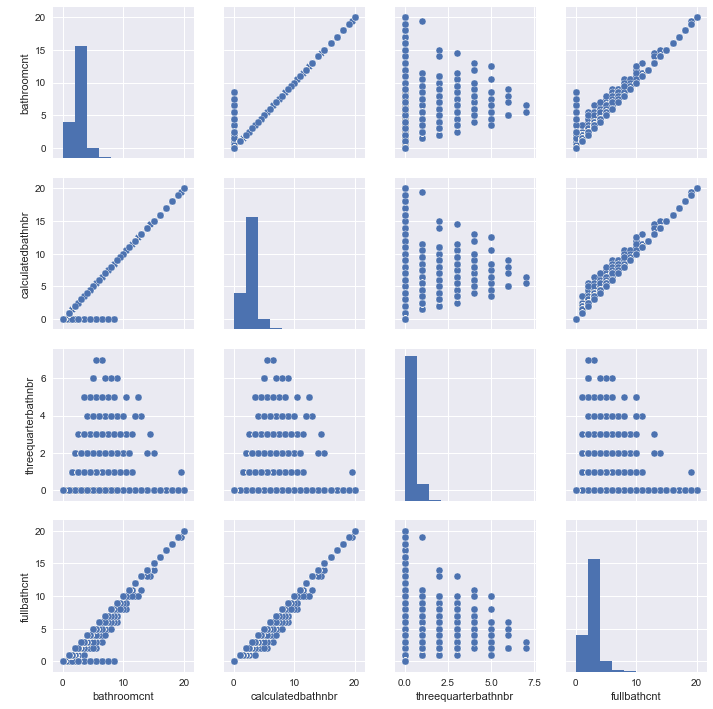

In [50]:
sns.pairplot(bathfamily_df)
plt.show()

## _taxfamily_

In [37]:
# 데이터프레임 만들기

taxfamily = ['taxvaluedollarcnt', 'structuretaxvaluedollarcnt',\
             'landtaxvaluedollarcnt', 'taxamount']
taxfamily_df = pd.DataFrame(columns=taxfamily)
taxfamily_df

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount


In [39]:
# 데이터프레임에 데이터 채워넣기

for i in taxfamily:
    taxfamily_df[i] = df[i]
taxfamily_df.tail()

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
2985212,NaN,NaN,NaN,NaN
2985213,NaN,NaN,NaN,NaN
2985214,NaN,NaN,NaN,NaN
2985215,NaN,NaN,NaN,NaN
2985216,NaN,NaN,NaN,NaN


In [40]:
# NaN value, 0으로 바꾸기

taxfamily_df.fillna(value=0, inplace=True)
taxfamily_df.tail()

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
2985212,0.0,0.0,0.0,0.0
2985213,0.0,0.0,0.0,0.0
2985214,0.0,0.0,0.0,0.0
2985215,0.0,0.0,0.0,0.0
2985216,0.0,0.0,0.0,0.0


In [41]:
# 새로운 속성 structure+land 만들기

taxfamily_df['structure+land'] = taxfamily_df['structuretaxvaluedollarcnt'] + \
taxfamily_df['landtaxvaluedollarcnt']
taxfamily_df.tail()

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,structure+land
2985212,0.0,0.0,0.0,0.0,0.0
2985213,0.0,0.0,0.0,0.0,0.0
2985214,0.0,0.0,0.0,0.0,0.0
2985215,0.0,0.0,0.0,0.0,0.0
2985216,0.0,0.0,0.0,0.0,0.0


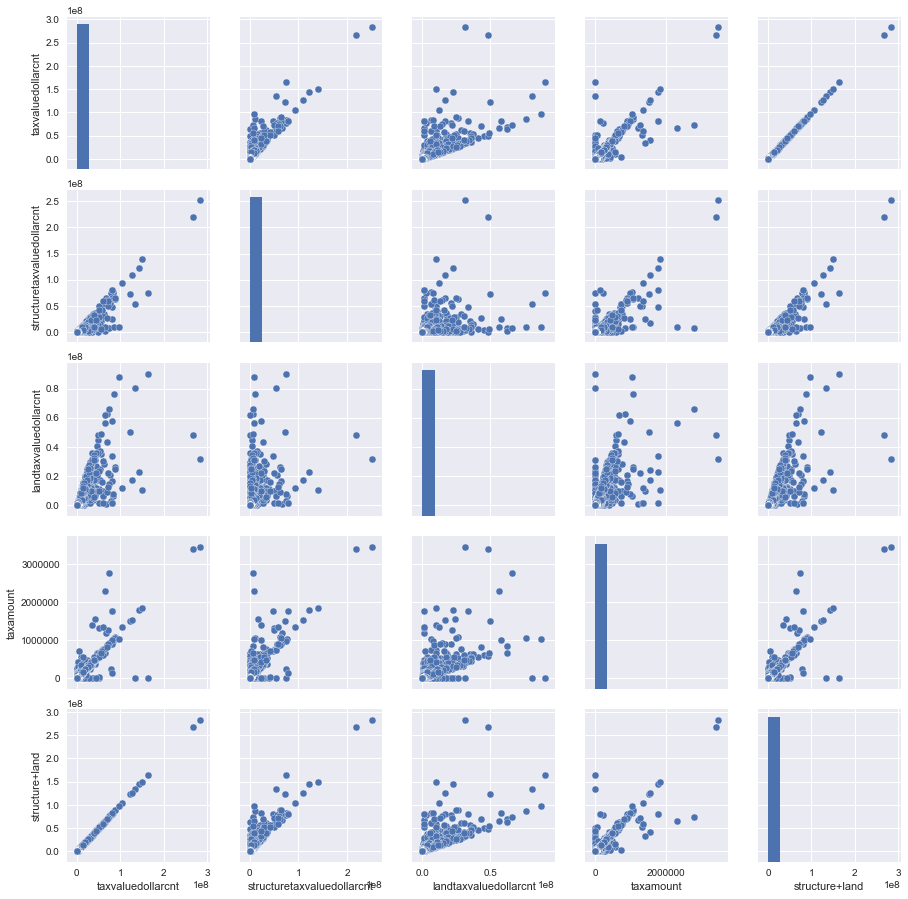

In [42]:
sns.pairplot(taxfamily_df)
plt.show()

#### _taxvaluedollarcnt : The total tax assessed value of the parcel_

In [ ]:
taxvaluedollarcnt_df = df.groupby(['taxvaluedollarcnt']).size().reset_index(name='counts')
taxvaluedollarcnt_df

In [ ]:
print(np.mean(taxvaluedollarcnt_df['taxvaluedollarcnt'].values))
print(np.median(taxvaluedollarcnt_df['taxvaluedollarcnt'].values))

In [ ]:
x = taxvaluedollarcnt_df['taxvaluedollarcnt'].values
y = taxvaluedollarcnt_df['counts'].values

plt.bar(x, y)
plt.show()

In [ ]:
x = taxvaluedollarcnt_df['taxvaluedollarcnt'].values
y = taxvaluedollarcnt_df['counts'].values

plt.subplot(2, 2, 1)
plt.plot(x)
plt.show()

plt.subplot(2, 2, 2)
plt.plot(x)
plt.xlim(638000, 639000)
plt.show()

plt.subplot(2, 2, 3)
plt.plot(x)
plt.xlim(638500, 639000)
plt.show()

plt.subplot(2, 2, 4)
plt.plot(x)
plt.xlim(0, 638500)
plt.show()

## _finishedsquare family_

In [56]:
finishedsquare = ['calculatedfinishedsquarefeet', 'finishedsquarefeet6', 'finishedsquarefeet12',\
                                          'finishedsquarefeet13', 'finishedsquarefeet15']
finishedsquare

['calculatedfinishedsquarefeet',
 'finishedsquarefeet6',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15']

In [57]:
finishedsquare_df = pd.DataFrame(columns=finishedsquare)
finishedsquare_df

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15


In [58]:
for i in finishedsquare:
    finishedsquare_df[i] = df[i]
finishedsquare_df.head(10)

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,73026.0,NaN,NaN,NaN,73026.0
3,5068.0,NaN,NaN,NaN,5068.0
4,1776.0,NaN,NaN,NaN,1776.0
5,2400.0,NaN,NaN,NaN,2400.0
6,NaN,NaN,NaN,NaN,NaN
7,3611.0,NaN,NaN,NaN,3611.0
8,NaN,NaN,NaN,NaN,NaN
9,3754.0,NaN,NaN,NaN,3754.0


In [62]:
# fillna

for i in finishedsquare:
    finishedsquare_df[i].fillna(0, inplace=True)
finishedsquare_df.head()

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,73026.0,0.0,0.0,0.0,73026.0
3,5068.0,0.0,0.0,0.0,5068.0
4,1776.0,0.0,0.0,0.0,1776.0


In [69]:
finishedsquare_df['finishedsquaresum'] = int(0)
finishedsquare_df.tail()

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquaresum
2985212,0.0,0.0,0.0,0.0,0.0,0
2985213,0.0,0.0,0.0,0.0,0.0,0
2985214,0.0,0.0,0.0,0.0,0.0,0
2985215,0.0,0.0,0.0,0.0,0.0,0
2985216,0.0,0.0,0.0,0.0,0.0,0


In [70]:
for i in finishedsquare[1:5]:
    finishedsquare_df['finishedsquaresum'] += finishedsquare_df[i]

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquaresum
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,73026.0,0.0,0.0,0.0,73026.0,73026.0
3,5068.0,0.0,0.0,0.0,5068.0,5068.0
4,1776.0,0.0,0.0,0.0,1776.0,1776.0
5,2400.0,0.0,0.0,0.0,2400.0,2400.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,3611.0,0.0,0.0,0.0,3611.0,3611.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,3754.0,0.0,0.0,0.0,3754.0,3754.0


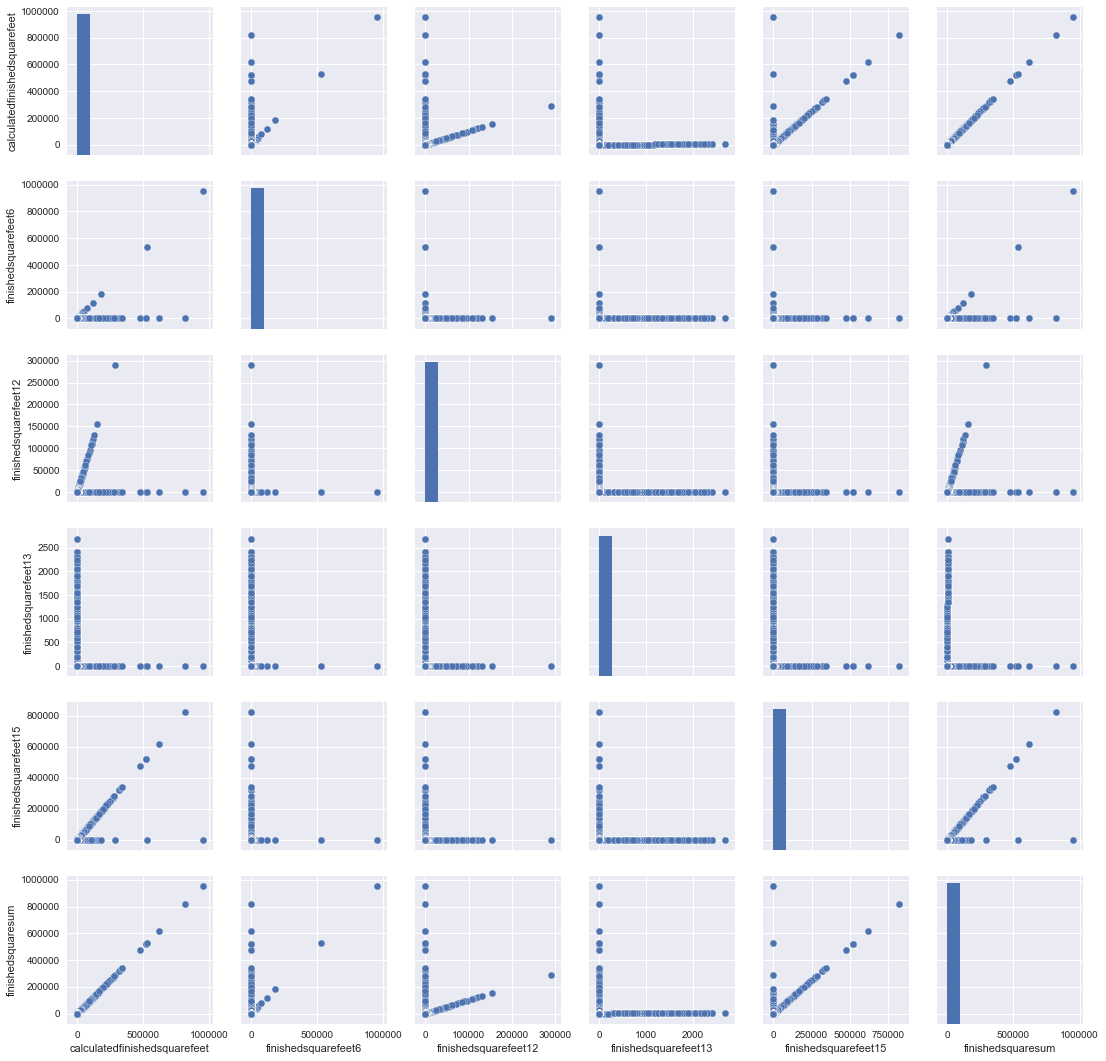

In [72]:
sns.pairplot(finishedsquare_df)
plt.show()

## _pool family_

In [78]:
poolfamily = ['poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7']
poolfamily

['poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7']

In [79]:
poolfamily_df = pd.DataFrame(columns=poolfamily)
poolfamily_df

,poolcnt,pooltypeid10,pooltypeid2,pooltypeid7


In [80]:
for i in poolfamily:
    poolfamily_df[i] = df[i]
poolfamily_df.tail()

,poolcnt,pooltypeid10,pooltypeid2,pooltypeid7
2985212,NaN,NaN,NaN,NaN
2985213,NaN,NaN,NaN,NaN
2985214,NaN,NaN,NaN,NaN
2985215,NaN,NaN,NaN,NaN
2985216,NaN,NaN,NaN,NaN


In [ ]:
y = poolfamily_df['poolcnt']
plt.hist(y, bins=10000000)
plt.show()

In [81]:
# fillna

for i in poolfamily:
    poolfamily_df[i].fillna(0, inplace=True)
poolfamily_df.tail()

,poolcnt,pooltypeid10,pooltypeid2,pooltypeid7
2985212,0.0,0.0,0.0,0.0
2985213,0.0,0.0,0.0,0.0
2985214,0.0,0.0,0.0,0.0
2985215,0.0,0.0,0.0,0.0
2985216,0.0,0.0,0.0,0.0


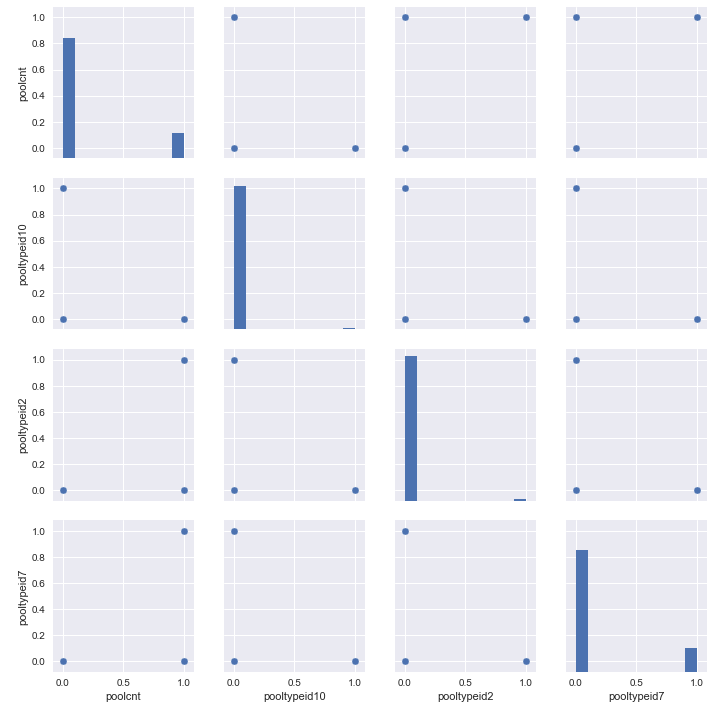

In [82]:
sns.pairplot(poolfamily_df)
plt.show()

In [83]:
poolfamily

['poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7']

In [ ]:
poolfamily_df